In [1]:
import configparser
import Hyperparameter_Tuner as HPT

#from sklearn.datasets import load_iris
#from sklearn.model_selection import train_test_split

class Optimizer:
    def __init__(self, config_file_name):
        self.config = config_file_name

        self.ML_algorithm = {}
        self.Opt_algorithm = {}
        #self.iris_dataset = load_iris()
        #self.iris_x, self.iris_X_test, self.iris_y, self.iris_y_test = train_test_split(self.iris_dataset['data'], self.iris_dataset['target'], random_state=0)

    def get_config(self):
        # read config file and save content as attribute
        self.configparser = configparser.ConfigParser()
        self.configparser.read('../' + self.config)
        print("configparser['ML_algorithm']['ML_name']")
        print(self.configparser['ML_algorithm']['ML_name'])
        
        # store ml_algorithm & opt_algorithm after change string to list
        # using dictionary in dictionary such as {BO : {A:1, B:2}, PSO : {C:3, D:4}}
        for opt in self.configparser['Opt_algorithm']['Opt_name'].split(','):
            hp_dict = {}
            opt_str = opt.strip().upper()
            for hp in self.configparser[opt_str + '_Hyperparameter']:
                hp_dict[hp] = self.configparser[opt_str + '_Hyperparameter'][hp]
            self.Opt_algorithm[opt_str] = hp_dict

        print(self.Opt_algorithm)

        for ml in self.configparser['ML_algorithm']['ML_name'].split(','):
            hp_dict = {}
            if ml.strip().upper() == 'RANDOMFOREST':
                ml_str = 'RF'
            else:
                ml_str = ml.strip().upper()
            for hp in self.configparser[ml_str + '_Hyperparameter']:
                hp_list = []
                if hp == 'kernel':
                    for ker in self.configparser[ml_str+'_Hyperparameter'][hp].split(','):
                        hp_list.append(ker.strip().strip("'").strip("'"))
                    hp_dict[hp] = hp_list

                else:
                    hp_num = self.configparser[ml_str+ '_Hyperparameter'][hp].split(',')
                    if hp_num[2].strip().strip('[').strip(']') == 'int':
                        hp_list.append(int(hp_num[0].strip().strip('[').strip(']')))
                        hp_list.append(int(hp_num[1].strip().strip('[').strip(']')))
                    elif hp_num[2].strip().strip('[').strip(']') == 'float':
                        hp_list.append(float(hp_num[0].strip().strip('[').strip(']')))
                        hp_list.append(float(hp_num[1].strip().strip('[').strip(']')))
                    hp_dict[hp] = hp_list
                self.ML_algorithm[ml_str] = hp_dict
 
        print(self.ML_algorithm)
 
    def run_Hyperparameter_Tuner(self, date):
        for opt_al in self.Opt_algorithm.keys():
            #with HPT.Hyperparameter_Tuner(opt_al, self.Opt_algorithm[opt_al], self.ML_algorithm) as Hyperparameter_Tuner_class:
                #Hyperparameter_Tuner_class.run_opt_algorithm()
            HPT_class = HPT.Hyperparameter_Tuner(opt_al, self.Opt_algorithm[opt_al], self.ML_algorithm)
            HPT_class.load_data(date)
            HPT_class.run_feature_selection()
            HPT_class.run_opt_algorithm()

configparser['ML_algorithm']['ML_name']
LR
{'PSO': {'num_particles': '10', 'num_generations': '50', 'num_out_fold': '2', 'num_in_fold': '2'}}
{'LR': {'log_tol': [-10.0, 10.0], 'c': [0.0, 10.0]}}

load_data
failure_data
            date serial_number          model  capacity_bytes  failure  \
0     2018-11-30      ZCH04DNH  ST12000NM0007  12000138625024        1   
1     2018-04-02      ZCH04S2S  ST12000NM0007  12000138625024        1   
2     2018-12-18      ZCH04ZE9  ST12000NM0007  12000138625024        1   
3     2018-10-28      ZCH057S1  ST12000NM0007  12000138625024        1   
4     2018-12-07      ZCH0657N  ST12000NM0007  12000138625024        1   
...          ...           ...            ...             ...      ...   
1418  2019-10-04      ZJV5JWCJ  ST12000NM0007  12000138625024        1   
1419  2019-11-26      ZJV5KQY4  ST12000NM0007  12000138625024        1   
1420  2019-10-16      ZJV5LWDJ  ST12000NM0007  12000138625024        1   
1421  2019-11-06      ZJV5MDP1  ST12000NM

after : 1423


      smart_1_normalized  smart_1_raw  smart_5_normalized  smart_5_raw  \
0                   83.0  209291528.0               100.0        888.0   
1                   61.0   61674472.0               100.0        960.0   
2                   84.0  229403552.0               100.0          0.0   
3                   79.0  229323360.0               100.0          0.0   
4                   83.0  220417128.0                97.0      11720.0   
...                  ...          ...                 ...          ...   
2841                79.0   88656136.0               100.0          0.0   
2842                83.0  186162752.0               100.0          0.0   
2843                71.0   11525752.0               100.0          0.0   
2844                74.0   26714520.0               100.0          0.0   
2845                76.0   42599672.0               100.0          0.0   

      smart_187_normalized  smart_187_raw  smart_194_normalized  \
0                     98.0   

0.8160535117056856
0  7  2
0.6885813148788927
0.8160535117056856
0  7  3
0.6885813148788927
0.8160535117056856
0  7  4
0.6885813148788927
0.7897435897435896
0  7  5
0.8037676609105181
0.0
0  7  6
0.6885813148788927
0.8160535117056856
0  7  7
0.6885813148788927
0.8160535117056856
0  7  8
0.0
0.0
0  7  9
0.6885813148788927
0.8160535117056856
0  8  0
0.7042735042735042
0.0
0  8  1
0.6885813148788927
0.8160535117056856
0  8  2
0.6885813148788927
0.8160535117056856
0  8  3
0.6885813148788927
0.8160535117056856
0  8  4
0.6885813148788927
0.8160535117056856
0  8  5
0.8037676609105181
0.0
0  8  6
0.6885813148788927
0.8160535117056856
0  8  7
0.6885813148788927
0.8160535117056856
0  8  8
0.0
0.0
0  8  9
0.6885813148788927
0.8160535117056856
0  9  0
0.7042735042735042
0.7849829351535836
0  9  1
0.6885813148788927
0.8160535117056856
0  9  2
0.6885813148788927
0.8160535117056856
0  9  3
0.6885813148788927
0.8160535117056856
0  9  4
0.6885813148788927
0.8160535117056856
0  9  5
0.778846153846154
0.

0.7897435897435896
0  26  8
0.7042735042735042
0.0
0  26  9
0.6885813148788927
0.7897435897435896
0  27  0
0.7042735042735042
0.0
0  27  1
0.6885813148788927
0.7849829351535836
0  27  2
0.6885813148788927
0.8160535117056856
0  27  3
0.6885813148788927
0.8160535117056856
0  27  4
0.5869158878504673
0.7849829351535836
0  27  5
0.778846153846154
0.0
0  27  6
0.6885813148788927
0.7897435897435896
0  27  7
0.6885813148788927
0.7897435897435896
0  27  8
0.7042735042735042
0.0
0  27  9
0.6885813148788927
0.7897435897435896
0  28  0
0.7042735042735042
0.0
0  28  1
0.6885813148788927
0.7849829351535836
0  28  2
0.6885813148788927
0.8160535117056856
0  28  3
0.6885813148788927
0.8160535117056856
0  28  4
0.5842696629213483
0.7849829351535836
0  28  5
0.778846153846154
0.0
0  28  6
0.6885813148788927
0.7897435897435896
0  28  7
0.6885813148788927
0.7897435897435896
0  28  8
0.7042735042735042
0.7849829351535836
0  28  9
0.6885813148788927
0.7897435897435896
0  29  0
0.7042735042735042
0.0
0  29  

0.5842696629213483
0.7849829351535836
0  47  5
0.7042735042735042
0.0
0  47  6
0.7042735042735042
0.0
0  47  7
0.7042735042735042
0.0
0  47  8
0.7042735042735042
0.0
0  47  9
0.7042735042735042
0.0
0  48  0
0.7042735042735042
0.0
0  48  1
0.7042735042735042
0.7849829351535836
0  48  2
0.5842696629213483
0.7849829351535836
0  48  3
0.7042735042735042
0.7849829351535836
0  48  4
0.5842696629213483
0.7849829351535836
0  48  5
0.7042735042735042
0.0
0  48  6
0.7042735042735042
0.0
0  48  7
0.7042735042735042
0.0
0  48  8
0.7042735042735042
0.0
0  48  9
0.7042735042735042
0.0
0  49  0
0.7042735042735042
0.0
0  49  1
0.5842696629213483
0.7849829351535836
0  49  2
0.5842696629213483
0.7849829351535836
0  49  3
0.5842696629213483
0.7849829351535836
0  49  4
0.7042735042735042
0.8172757475083057
0  49  5
0.7042735042735042
0.8172757475083057
0  49  6
0.7042735042735042
0.0
0  49  7
0.5842696629213483
0.7849829351535836
0  49  8
0.7042735042735042
0.7849829351535836
0  49  9


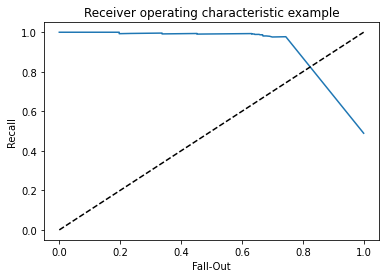

f1-score = 0.6910112359550562,
 when hyperparameters '{'log_tol': 3.9707812499999977, 'c': 3.5627289804446187}' were entered.

0.8045977011494253
0.8336192109777015
1  0  0
0.7534246575342465
0.8007054673721341
1  0  1
0.7534246575342465
0.8007054673721341
1  0  2
0.6654343807763401
0.7453874538745386
1  0  3
0.0
0.0
1  0  4
0.7534246575342465
0.8007054673721341
1  0  5
0.7534246575342465
0.8007054673721341
1  0  6
0.8045977011494253
0.8336192109777015
1  0  7
0.7383015597920277
0.7921847246891652
1  0  8
0.7534246575342465
0.8007054673721341
1  0  9
0.8045977011494253
0.8336192109777015
1  1  0
0.7534246575342465
0.8007054673721341
1  1  1
0.7534246575342465
0.8007054673721341
1  1  2
0.6824817518248175
0.7430683918669131
1  1  3
0.0
0.0
1  1  4
0.7534246575342465
0.8007054673721341
1  1  5
0.7534246575342465
0.8007054673721341
1  1  6
0.8045977011494253
0.8336192109777015
1  1  7
0.7383015597920277
0.7921847246891652
1  1  8
0.7534246575342465
0.8007054673721341
1  1  9
0.80459770114

0.7534246575342465
0.8007054673721341
1  18  2
0.8045977011494253
0.8336192109777015
1  18  3
0.8045977011494253
0.8336192109777015
1  18  4
0.6654343807763401
0.7453874538745386
1  18  5
0.7383015597920277
0.7921847246891652
1  18  6
0.8045977011494253
0.8336192109777015
1  18  7
0.8045977011494253
0.8336192109777015
1  18  8
0.7534246575342465
0.8007054673721341
1  18  9
0.8045977011494253
0.8336192109777015
1  19  0
0.7534246575342465
0.8007054673721341
1  19  1
0.7534246575342465
0.8007054673721341
1  19  2
0.8045977011494253
0.8336192109777015
1  19  3
0.8045977011494253
0.8336192109777015
1  19  4
0.6824817518248175
0.7430683918669131
1  19  5
0.7383015597920277
0.7921847246891652
1  19  6
0.8045977011494253
0.8336192109777015
1  19  7
0.8045977011494253
0.8336192109777015
1  19  8
0.7534246575342465
0.8007054673721341
1  19  9
0.8045977011494253
0.8336192109777015
1  20  0
0.7534246575342465
0.8007054673721341
1  20  1
0.7534246575342465
0.8007054673721341
1  20  2
0.80459770114

0.7921847246891652
1  36  9
0.8045977011494253
0.8336192109777015
1  37  0
0.8045977011494253
0.8336192109777015
1  37  1
0.6824817518248175
0.7430683918669131
1  37  2
0.8045977011494253
0.8336192109777015
1  37  3
0.8045977011494253
0.8336192109777015
1  37  4
0.8045977011494253
0.8336192109777015
1  37  5
0.8045977011494253
0.8336192109777015
1  37  6
0.8045977011494253
0.8336192109777015
1  37  7
0.8045977011494253
0.8336192109777015
1  37  8
0.7383015597920277
0.7921847246891652
1  37  9
0.8045977011494253
0.8336192109777015
1  38  0
0.8045977011494253
0.8336192109777015
1  38  1
0.7298245614035088
0.7964601769911503
1  38  2
0.8045977011494253
0.8336192109777015
1  38  3
0.8045977011494253
0.8336192109777015
1  38  4
0.8045977011494253
0.8336192109777015
1  38  5
0.8045977011494253
0.8336192109777015
1  38  6
0.8045977011494253
0.8336192109777015
1  38  7
0.8045977011494253
0.8336192109777015
1  38  8
0.7383015597920277
0.7921847246891652
1  38  9
0.8045977011494253
0.83361921097

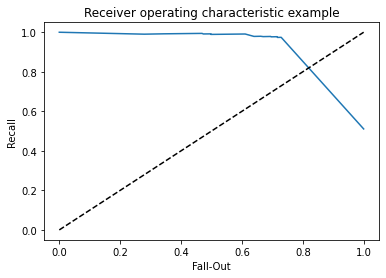

f1-score = 0.81285140562249,
 when hyperparameters '{'log_tol': 4.55078125, 'c': 1.982421875}' were entered.

[[[0.7523174132922892, 0.0, 0.7391624523112412, 0.7523174132922892, 0.7523174132922892, 0.7391624523112412, 0.0, 0.7523174132922892, 0.7523174132922892, 0.0], [0.7523174132922892, 0.0, 0.7391624523112412, 0.7523174132922892, 0.7523174132922892, 0.7391624523112412, 0.0, 0.7523174132922892, 0.7523174132922892, 0.0], [0.7523174132922892, 0.40188383045525905, 0.7391624523112412, 0.7523174132922892, 0.7523174132922892, 0.7391624523112412, 0.0, 0.7523174132922892, 0.7523174132922892, 0.0], [0.7523174132922892, 0.40188383045525905, 0.7391624523112412, 0.7523174132922892, 0.7523174132922892, 0.7391624523112412, 0.0, 0.7523174132922892, 0.7523174132922892, 0.0], [0.7523174132922892, 0.40188383045525905, 0.7391624523112412, 0.7523174132922892, 0.7523174132922892, 0.7391624523112412, 0.0, 0.7523174132922892, 0.7523174132922892, 0.0], [0.7523174132922892, 0.40188383045525905, 0.73916245231

In [2]:
import sys
import numpy

time = [1]
for date in time:
    opt = Optimizer('config')
    opt.get_config()
    opt.run_Hyperparameter_Tuner(date)